In [6]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [8]:
data['Processed_Comment'] = data['Cleaned_Comment'].apply(remove_stopwords)


In [9]:
# Save cleaned data to a new CSV
data.to_csv("cleaned_data.csv", index=False)
print("Step 2 completed: Cleaned data saved to 'cleaned_data.csv'")

Step 2 completed: Cleaned data saved to 'cleaned_data.csv'


In [10]:
# Placeholder sentiment labels for demonstration
import random

# Randomly assigning sentiment for demo purposes
data['Sentiment'] = [random.choice([1, 0, -1]) for _ in range(len(data))]

# Save labeled data to a new CSV
data.to_csv("labeled_data.csv", index=False)
print("Step 3 completed: Sentiment labeled data saved to 'labeled_data.csv'")


Step 3 completed: Sentiment labeled data saved to 'labeled_data.csv'


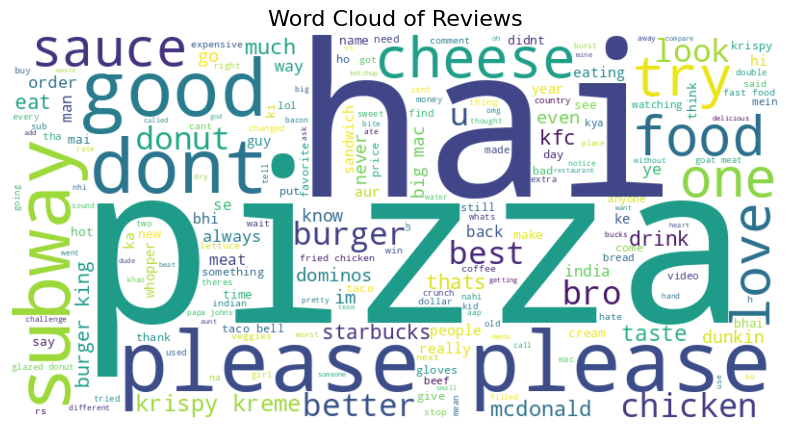

<ipython-input-11-1f2113cc62df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


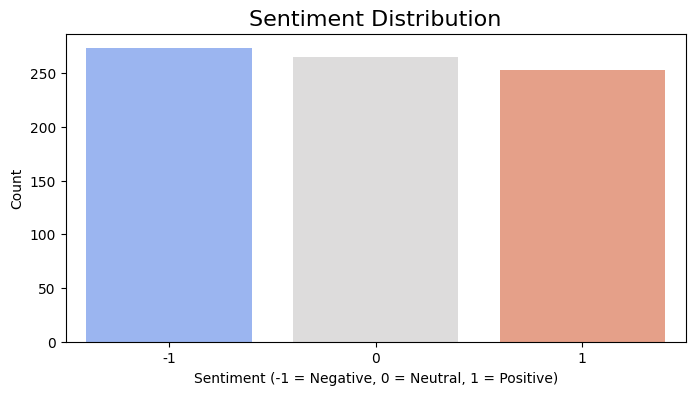

Step 4 completed: Analysis visualizations generated.


In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load labeled data
data = pd.read_csv("labeled_data.csv")

# Generate Word Cloud
text = ' '.join(data['Processed_Comment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews", fontsize=16)
plt.show()

# Sentiment Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=data, palette='coolwarm')
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Count")
plt.show()

print("Step 4 completed: Analysis visualizations generated.")


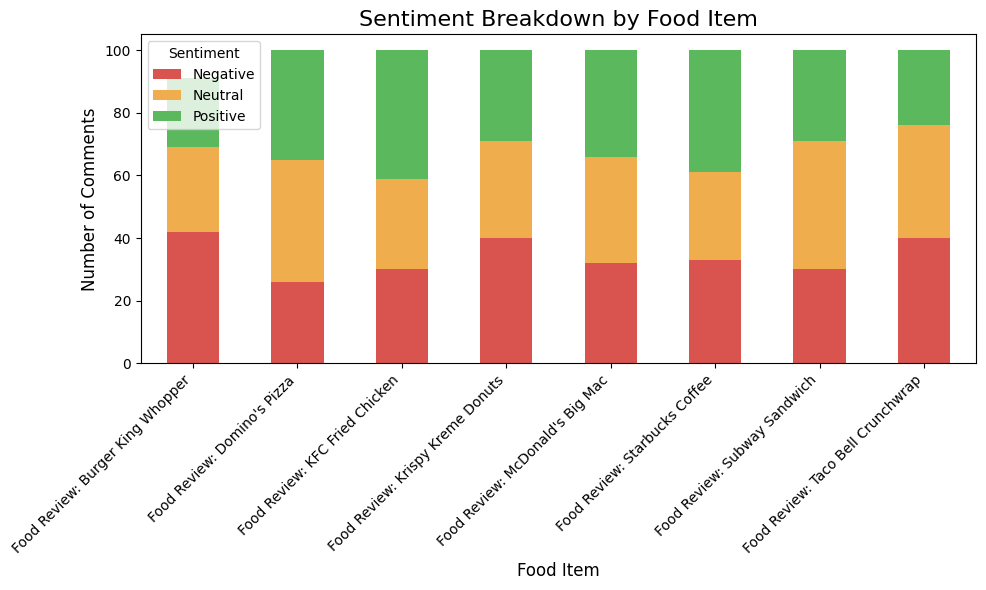

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure labeled data is loaded
data = pd.read_csv("labeled_data.csv")

# Group data by Food Name and Sentiment, then count occurrences
sentiment_counts = data.groupby(['Food Name', 'Sentiment']).size().reset_index(name='Count')

# Pivot for a stacked bar chart
pivot_data = sentiment_counts.pivot(index='Food Name', columns='Sentiment', values='Count').fillna(0)

# Define sentiment labels
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

# Rename columns for clarity
pivot_data = pivot_data.rename(columns=sentiment_labels)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#d9534f', '#f0ad4e', '#5cb85c'])

# Add labels and title
plt.title('Sentiment Breakdown by Food Item', fontsize=16)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-13-08416da6d6c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Food Name', data=avg_sentiment, palette='coolwarm')


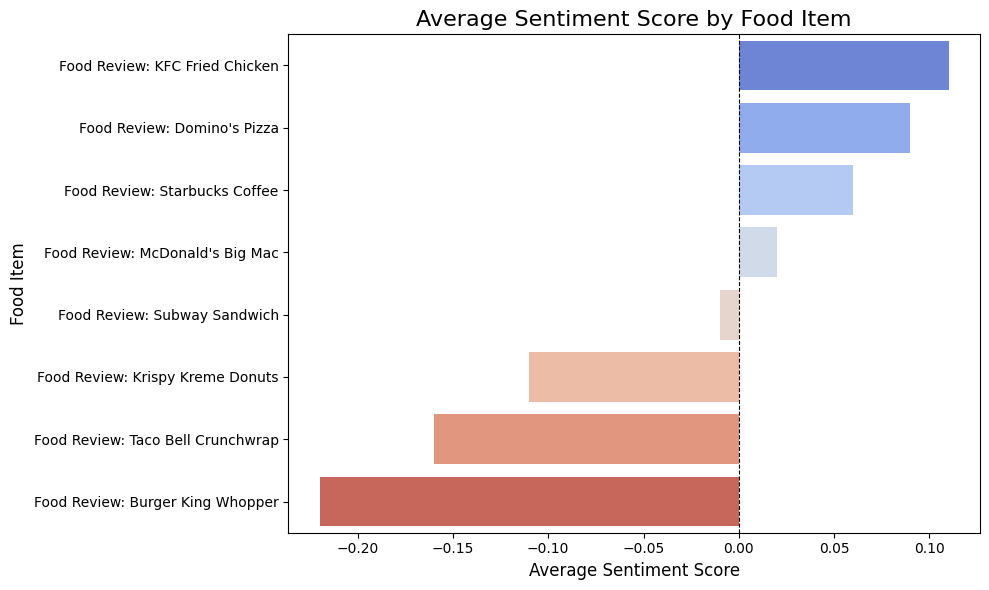

In [13]:
# Calculate the average sentiment score for each food item
avg_sentiment = data.groupby('Food Name')['Sentiment'].mean().reset_index()

# Sort by sentiment score for better visualization
avg_sentiment = avg_sentiment.sort_values(by='Sentiment', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Food Name', data=avg_sentiment, palette='coolwarm')

# Add labels and title
plt.title('Average Sentiment Score by Food Item', fontsize=16)
plt.xlabel('Average Sentiment Score', fontsize=12)
plt.ylabel('Food Item', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a reference line for neutral sentiment
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the labeled data
data = pd.read_csv("labeled_data.csv")

# Extract features and labels
X = data['Comment']  # Text data
y = data['Sentiment']  # Labels (-1, 0, 1)

# Convert text data to numerical features using TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Data preparation complete.")


Data preparation complete.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Hyperparameter tuning using GridSearchCV (example for Logistic Regression)
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid.best_estimator_
print(f"Best Model: {best_model}")


Best Model: LogisticRegression(C=0.1, max_iter=1000)


Accuracy: 0.32075471698113206

Classification Report:
               precision    recall  f1-score   support

          -1       0.32      0.61      0.42        56
           0       0.30      0.22      0.26        54
           1       0.36      0.10      0.16        49

    accuracy                           0.32       159
   macro avg       0.33      0.31      0.28       159
weighted avg       0.33      0.32      0.28       159



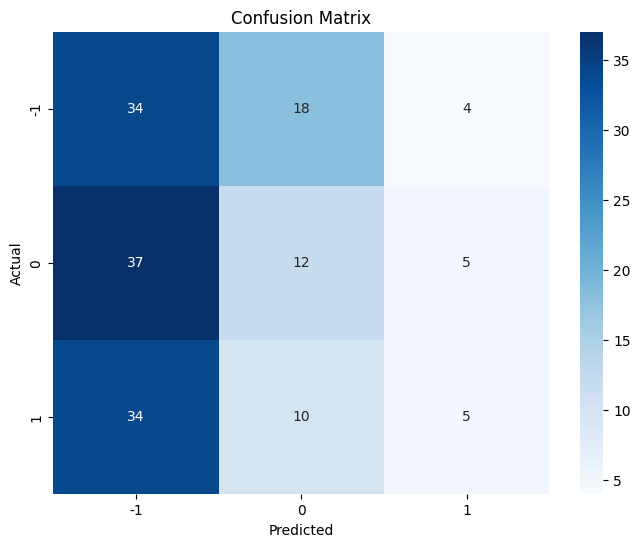

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

# Test with an example comment
example_comment = "This is the best food I’ve ever had!"
result = sentiment_model(example_comment)

print("Sentiment Analysis Result:", result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9998726844787598}]
